# CS412 - Machine Learning - 2023
## Homework 1
100 pts

## Software:

You may find the necessary function references here:

http://scikit-learn.org/stable/supervised_learning.html

When you search for KNeighborsClassifier for instance, you should find the relevant function and explained parameters, easily.

## Submission:
Fill this notebook. Write the report section at the end, removing the part in italics.

You should prepare a separate pdf document as your homework (name HW1-CS412-yourname.pdf) which consists of the report (Part 8) of the notebook for easy viewing -and- include a link to your notebook from within the pdf report (make sure to include the link obtained from the **Share** button on top right).

##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you click the Connect button from upper right.


In [ ]:
import numpy as np
np.random.seed(412)

## 2) Load training dataset

*  Read MNIST dataset from Keras library.



In [ ]:
# this cell can be skipped at the running time
from keras.datasets import mnist
(X_train, Y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


##3) Reshape the MNIST data

  In order to use images as input data for the sklearn k-NN classifier, the 2D image arrays need to be reshaped into a 1D arrays (in other words, a feature vector).

In [ ]:
print('Before reshaping: ', X_train.shape, X_test.shape)

Before reshaping:  (60000, 28, 28) (10000, 28, 28)


In [ ]:
N_train, height, width = X_train.shape

X_train = np.reshape(X_train, (N_train, height*width)) # from array of shape N_train x 28 x 28 ---> N_train x 784 (Note: 28*28 = 784)
X_test = np.reshape(X_test, (len(X_test), height*width)) # from array of shape N_test x 28 x 28 ---> N_test x 784

In [ ]:
print('After reshaping: ', X_train.shape, X_test.shape)

After reshaping:  (60000, 784) (10000, 784)


##4) Shuffle and Split TRAINING data as train (also called development) (80%) and validation (20%)

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Shuffle the training data
X_train, Y_train = shuffle(X_train, Y_train)

# Split %80 train - 20% val
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2)
# Before

##5) Train k-NN  classifier on development data and do model selection using the validation data


* Train a k-NN classifier (use the values specified in the homework PDF file, do not try other values) with the rest of the parameters set to default.

* The aim in this homework is not necessarily obtaining the best performance, but to establish the ML pipeline (train a few models, select based on validation set, test, report).


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 3, 5, 7, 9, 11, 13]   # <--- Fill the list with the values for n_neighbors

best_acc = -1
best_k = None
val_accs = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, Y_train)
  y_pred = knn.predict(X_val)
  acc = accuracy_score(Y_val, y_pred)
  val_accs.append(acc)

  if acc > best_acc:
    best_acc = acc
    best_k = k


  print('Validation accuracy for k=', k, ' :', acc)
  # if validation accuracy is better than best_acc, update best_acc and best_k

print('Best validation accuracy (', best_acc, ') is achieved with k=', best_k)

Validation accuracy for k= 1  : 0.9711666666666666
Validation accuracy for k= 3  : 0.9708333333333333
Validation accuracy for k= 5  : 0.9699166666666666
Validation accuracy for k= 7  : 0.9676666666666667
Validation accuracy for k= 9  : 0.96625
Validation accuracy for k= 11  : 0.9655
Validation accuracy for k= 13  : 0.96475
Best validation accuracy ( 0.9711666666666666 ) is achieved with k= 1


## 6) Plot the obtained validation accuracies versus k values

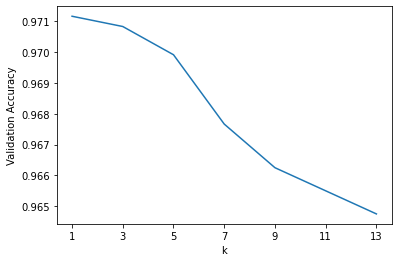

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k_values, val_accs)
plt.xticks(k_values)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.show()

## 7) Test your classifier on test set

- Now that you have the best value for the ***n_neighbors*** parameter, train a model **with best parameters that you have found according to your validation results**. But now, train the model by combining the training and validation sets. Then report the accuracy on the test set.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k)
X_trainval = np.concatenate((X_train, X_val), axis = 0)
Y_trainval = np.concatenate((Y_train, Y_val), axis = 0)
knn.fit(X_trainval, Y_trainval)
y_pred = knn.predict(X_test)

testing_acc = accuracy_score(y_test, y_pred)

print('Test accuracy for k=', best_k, ' :', best_acc)


# Report your result

Test accuracy for k= 1  : 0.9711666666666666


##8) Report your results

We have implemented a k-NN classifier by using Scikit-learn library and found the optimal number of nearest neighbors. The dataset was downloaded from the Keras Library MNIST dataset.  
Firstly, we prepared our data and reshaped the MNIST data into a 1D feature vector to use images as input data for the k-NN classifier. Then we shuffled and split our data into a train set (80%) and a validation set (20%) for our model selection.

On our next step, we trained our k-NN classifier with n_neighbors values of 1,3,5,7,9,11,13. Then we evaluated the performance of each model on our validation set.
After evaluating the performance, we plotted the validation accuracies and n_neighbors to visualize the relationship between them using the Matplotlib library.












After plotting our relationship, we chose the optimal value of n_neighbors based on our validation results.
Finally, we trained the model with best parameters which were obtained by our validation results by combining the training and validation sets and tested it on our test set. The validation accuracies for each n_neighbors are shown below:






n_neighbors	Validation Accuracy
1	= 0.0994
3 =	0.0946
5 =	0.0961
7 =	0.1007
9 =	0.1031
11 = 0.1034
13 =	0.1033


We have obtained the best results on the validation set with the k-NN classifier approach using a value of 11 for the n_neighbors parameter. The result of this model on the test data is 10.34% accuracy.
